# Decision Tree 

In [71]:
import pandas as pd
import numpy as np
from IPython.display import Image

In [72]:
import os
os.chdir(r"C:\Users\user\과제\tree_gain_ratio")
workingdir = os.path.join(os.getcwd(), '.')
os.chdir(os.path.join(workingdir, 'modules' )) 

In [73]:
# dataset 소환
data = pd.read_csv(r'tic-tac-toe-endgame.csv')
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive
...,...,...,...,...,...,...,...,...,...,...
953,o,x,x,x,o,o,o,x,x,negative
954,o,x,o,x,x,o,x,o,x,negative
955,o,x,o,x,o,x,x,o,x,negative
956,o,x,o,o,x,x,x,o,x,negative


In [74]:
# y 기준 내림차순 정렬
data.sort_values(by="V10", ascending=True, inplace=True)

# index 재설정
data = data.reset_index(drop=True)

In [75]:
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,o,o,x,x,x,o,o,x,x,negative
1,x,b,o,b,o,x,o,b,x,negative
2,x,b,o,b,o,b,o,x,x,negative
3,x,b,o,b,b,o,x,x,o,negative
4,x,b,b,x,x,b,o,o,o,negative
...,...,...,...,...,...,...,...,...,...,...
953,o,x,o,x,x,x,b,b,o,positive
954,o,x,o,x,x,o,o,x,x,positive
955,o,x,o,x,x,o,b,x,b,positive
956,o,x,x,b,x,b,x,o,o,positive


In [76]:
# target data 이름 넣기 #
target_att = 'V10'

X = data.loc[:, data.columns != target_att]
y = data.loc[:, data.columns == target_att]

In [77]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9
0,o,o,x,x,x,o,o,x,x
1,x,b,o,b,o,x,o,b,x
2,x,b,o,b,o,b,o,x,x
3,x,b,o,b,b,o,x,x,o
4,x,b,b,x,x,b,o,o,o
...,...,...,...,...,...,...,...,...,...
953,o,x,o,x,x,x,b,b,o
954,o,x,o,x,x,o,o,x,x
955,o,x,o,x,x,o,b,x,b
956,o,x,x,b,x,b,x,o,o


In [78]:
# 기존 sklearn에 구현된 모델용 설정 # 

## y의 name 
target_att = 'V10'

## x의 name
in_feature = list(data.columns [data.columns != target_att])

## data column 중 categorical variable 찾기
cate_col = [col for col in in_feature if not np.issubdtype(X[col].dtype, \
    np.number)]

## X의 string 값을 dummey variable로 변환 
X_dummies= pd.get_dummies(X.loc[:,in_feature], columns=cate_col)
feature_names = X_dummies.columns

## y의 string 값을 numeric으로 변환 
y, class_names = pd.factorize(data[target_att])

from sklearn.model_selection import train_test_split  
## train, test = 8:2, random split
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.2)

In [107]:
print('train data length : ',len(X_train))
print('test data length : ',len(X_test))

train data length :  766
test data length :  192


In [79]:
feature_names

Index(['V1_b', 'V1_o', 'V1_x', 'V2_b', 'V2_o', 'V2_x', 'V3_b', 'V3_o', 'V3_x',
       'V4_b', 'V4_o', 'V4_x', 'V5_b', 'V5_o', 'V5_x', 'V6_b', 'V6_o', 'V6_x',
       'V7_b', 'V7_o', 'V7_x', 'V8_b', 'V8_o', 'V8_x', 'V9_b', 'V9_o', 'V9_x'],
      dtype='object')

In [80]:
y, class_names

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [81]:
X_train

,V1_b,V1_o,V1_x,V2_b,V2_o,V2_x,V3_b,V3_o,V3_x,V4_b,...,V6_x,V7_b,V7_o,V7_x,V8_b,V8_o,V8_x,V9_b,V9_o,V9_x
281,0,1,0,0,0,1,1,0,0,1,...,1,1,0,0,0,0,1,0,1,0
518,0,0,1,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,1,0
152,0,0,1,0,1,0,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
363,1,0,0,0,1,0,0,0,1,0,...,1,0,0,1,1,0,0,0,1,0
371,1,0,0,0,0,1,0,0,1,0,...,1,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,1,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
873,0,0,1,1,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
64,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
627,0,0,1,0,0,1,0,0,1,1,...,0,0,0,1,1,0,0,0,1,0


## 여기서 부터 "구현한" 코드에 대한 설명 ##

### 경로설정 ###

In [82]:
import os
os.chdir(r"C:\Users\user\과제\tree_gain_ratio")
workingdir = os.path.join(os.getcwd(), '.')
os.chdir(os.path.join(workingdir, 'modules' )) 

In [83]:
os.getcwd()

'C:\\Users\\user\\과제\\tree_gain_ratio\\modules'

### 파일 컴파일 ###

In [84]:
# entropy_gain을 구하기 위한 .py파일 # 총 4개(파일 4개가 연동되어있으니 수정은 삼가해주길 바람)
from usertree import userTree as utr
import utils

### 기본 파라미터 설정 및 데이터 스플릿 ###

In [85]:
# DT termination criteria #
## MAX_DEPTH: 기존 모델의 max_depth와 같음
## min_samples_leaf: 기존모델의 min_samples_leaf와 같음
# -> MAX_DEPTH는 변경불가 
MAX_DEPTH = 1000

sample_ratio = 0.02
min_sample_leaf = round(sample_ratio * len(X_train))

# data를 data frame형태로 train, test로 나눔
train_idx, test_idx = X_train.index, X_test.index
train, test = data.loc[train_idx,:], data.loc[test_idx,:]

# 추가된 부분1
> 이쪽부터 코드가 추가 되었습니다. 

아래 세 코드는 실제 y의 class별 분포 및 갯수를 확인하기 위함 

In [86]:
# 이 부분 꼭 해주어야함 #
train = train.sort_index()
train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,o,o,x,x,x,o,o,x,x,negative
1,x,b,o,b,o,x,o,b,x,negative
2,x,b,o,b,o,b,o,x,x,negative
3,x,b,o,b,b,o,x,x,o,negative
4,x,b,b,x,x,b,o,o,o,negative
...,...,...,...,...,...,...,...,...,...,...
953,o,x,o,x,x,x,b,b,o,positive
954,o,x,o,x,x,o,o,x,x,positive
955,o,x,o,x,x,o,b,x,b,positive
956,o,x,x,b,x,b,x,o,o,positive


In [87]:
#  실제 데이터의 class별 각 갯수 #
## original y의 class 수 ##

# data y의 이름을 넣으면 됌 #
uni_class = np.unique(data['V10'])

class_number = {}
for i in uni_class:    
    class_number[i] = len(data[data['V10'] == i])
    
class_number

{'negative': 332, 'positive': 626}

In [88]:
# 실제 train 데이터의 class별 각 갯수 #

# data의 y의 이름을 넣으면 됌 #
tra_uni_class = np.unique(train['V10'])
tra_class_number = {}
for i in tra_uni_class:    
    tra_class_number[i] = len(train[train['V10'] == i])
    
tra_class_number

{'negative': 265, 'positive': 501}

### 모델 생성 ###
> min sample leaf, max depth, params(entropy, gini, entropy_GR 중 하나) 순으로 알맞게 넣음

-> simplify는 꼭 True로 설정해주세요.

In [89]:
# 모델 생성 #
## min_samples_leaf: 노드의 최소 데이터 수
## MAX_DEPTH: 나무의 가지 수
## params: 분기기준 -> entropy, gini, entropy_GR 총 3개 사용가능
## simplify: 각 어떤 노드를 기준으로 child node로 분기 했을 때 child node의 분기 예측값이 같다면 분기하지않고 이전 노드를 유지함
# -> simplify는 True로 설정해주세요.

# CART_gini_ins = utr(min_sample_leaf, MAX_DEPTH, params ='entropy', simplify=True)
# CART_gini_ins = utr(min_sample_leaf, MAX_DEPTH, params ='gini', simplify=True)
CART_gini_ins = utr(min_sample_leaf, MAX_DEPTH, params ='entropy_GR', simplify=True)

### 모델 피팅 ###
> train data와 data의 target 이름을 각각 넣음

In [90]:
# 모델 피팅 # 
## train: dataframe형태로 된 data
## target_attribute_name: target data로 설정된 y값 이름
gini_tree, gini_pprint_tree= CART_gini_ins.fit(train, target_attribute_name = "V10")  

In [91]:
## CART_gini_tree: tree에서 분리된 노드들의 분기기준과 data의 index, target(=class)가 출력 -> 성능측정용
## CART_gini_graph_tree: tree 그래프를 생성하기 위한 값 저장 
CART_gini_tree, CART_gini_graph_tree = CART_gini_ins.tree, CART_gini_ins.graph_tree

# 추가된 부분2
> pred, depth, homogeneity, lift, coverage, number_of_variable 수치를 편하게 구할 수 있도록 구현함

In [92]:
## utils.get_usrt_info 코드 설명 ##
# train: data의 train data
# CART_gini_tree: tree에서 분리된 노드들의 분기기준과 data의 index, target(=class)가 출력 -> 성능측정용
# target_att: data의 y이름

utils.get_usrt_info(train ,CART_gini_tree, target_att = "V10")


class prior: [0.34595300261096606, 0.6540469973890339]
leaf node별 class수: [0, 174]
leaf node별 class수: [0, 46]
leaf node별 class수: [0, 17]
leaf node별 class수: [22, 0]
leaf node별 class수: [4, 17]
leaf node별 class수: [23, 0]
leaf node별 class수: [0, 72]
leaf node별 class수: [5, 25]
leaf node별 class수: [25, 0]
leaf node별 class수: [7, 27]
leaf node별 class수: [28, 0]
leaf node별 class수: [55, 0]
leaf node별 class수: [17, 0]
leaf node별 class수: [6, 17]
leaf node별 class수: [12, 4]
leaf node별 class수: [0, 29]
leaf node별 class수: [30, 0]
leaf node별 class수: [12, 5]
leaf node별 class수: [0, 25]
leaf node별 class수: [19, 12]
leaf node별 class수: [0, 31]


,pred,depth,homogeneity,lift,coverage,number_of_variable
0,1,3,1.000,1.5289,0.227,3
1,0,3,1.000,2.8906,0.072,3
2,1,4,1.000,1.5289,0.094,4
3,1,4,0.794,1.2140,0.044,4
4,0,4,1.000,2.8906,0.037,4
5,0,4,1.000,2.8906,0.039,4
6,0,4,0.613,1.7719,0.040,4
7,1,4,1.000,1.5289,0.040,4
8,1,5,1.000,1.5289,0.060,5
9,1,5,0.810,1.2384,0.027,5


### 그래프 생성 ###
> CART_gini_ins.graph.tree_to_graph에 CART_gini_graph_tree를 넣고 node와 edge에 대한 데이터를 생성한 뒤, \
> node와 edge에 "\n"을 덫붙여서 tree graph를 생성함.

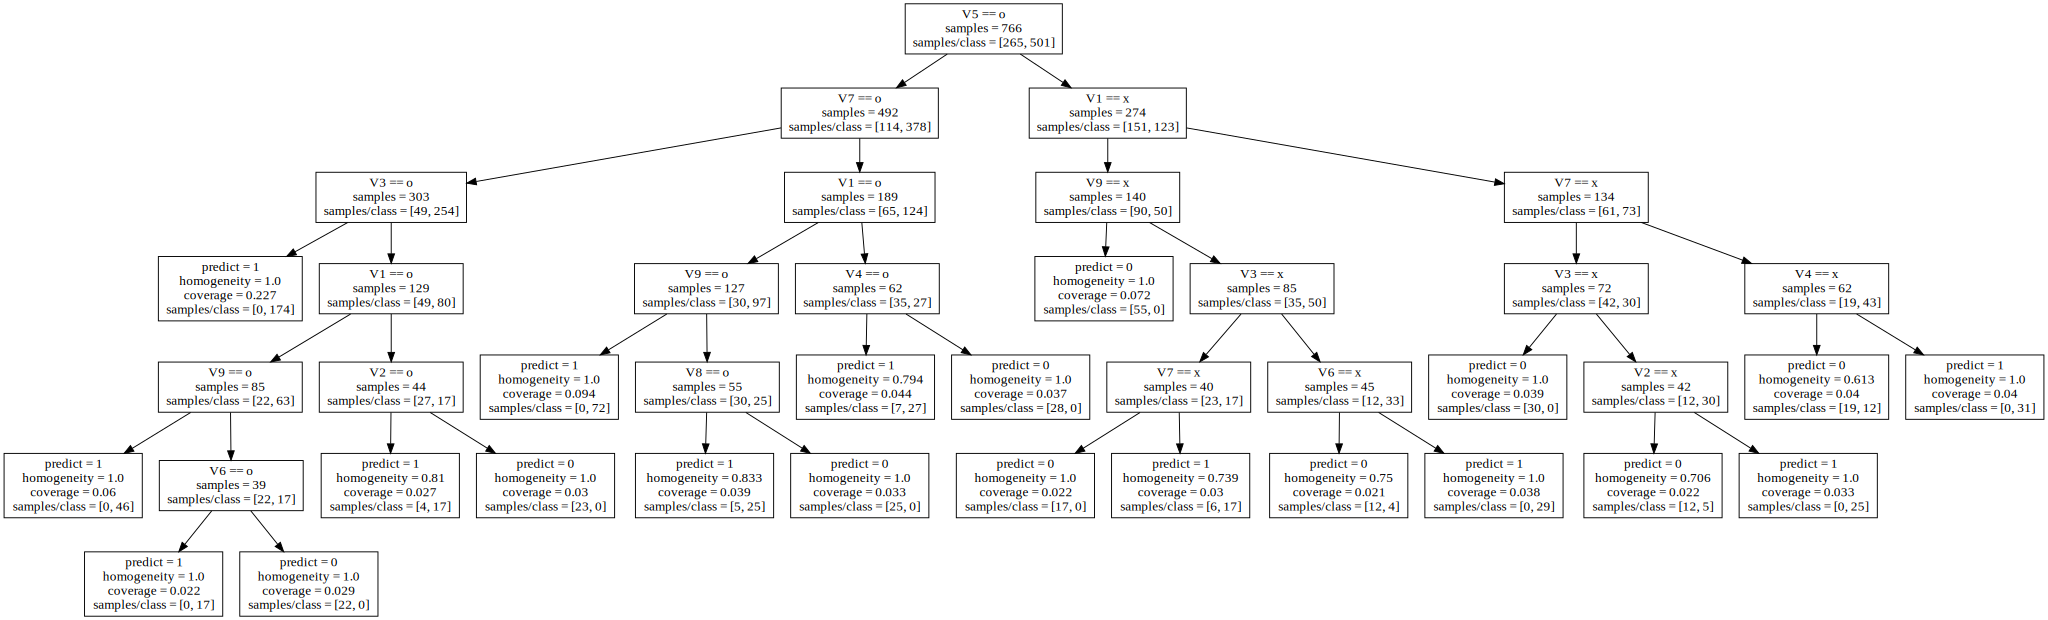

In [93]:
import graphviz
graph_dir = 'graph'
node, edge = CART_gini_ins.graph.tree_to_graph(CART_gini_graph_tree)
tree_graph = graphviz.Source(node + edge+'\n}')
tree_graph

# 유의사항: 왼쪽 화살표가 False, 오른쪽 화살표가 True임

In [94]:
# PDF 파일 출력 #
graph_dir = 'graph'
split = 'geni'
d_set_name = 'tic-tac-toe'

tree_graph.render('{}/CART_{}_{}_test'.format(graph_dir, split,d_set_name))

'graph\\CART_geni_tic-tac-toe_test.pdf'

## 성능 측정 ##
> CART_gini_ins.predict에 Dataframe형태의 x,y가 동시에 존재하는 train or test data와 이전에 선언한 CART_entropy_GR_tree를 넣으면, \
> predict, predict probability가 각각 생성됨 

In [95]:
# 성능측정 #
## train predict ##
train = data.loc[train_idx,:]

train_CART_gini_all_pred, train_CART_gini_all_pred_prob \
    = CART_gini_ins.predict(train, CART_gini_tree)

## test predict ## 
test_CART_gini_all_pred, test_CART_gini_all_pred_prob \
    = CART_gini_ins.predict(test, CART_gini_tree)

> utils.perform_check에 train or test data의 y값, predict, probability, class의 갯수,  CLASS_DICT_를 넣으면 \
> train or test data의 [accuracy, recall, precision, f1, auc] 순으로 값이 생성 


In [96]:
# y의 name 넣기 
classes = np.unique(train['V10'])
 
# train metric
train_CART_gini_all_met = utils.perform_check(train['V10'], \
         train_CART_gini_all_pred, \
         train_CART_gini_all_pred_prob,\
         len(classes), CART_gini_ins.CLASS_DICT_)

# test metric
test_CART_gini_all_met = utils.perform_check(test["V10"], \
         test_CART_gini_all_pred, \
         test_CART_gini_all_pred_prob, \
         len(classes), CART_gini_ins.CLASS_DICT_)

In [97]:
# [accuracy, recall, precision, f1, auc] 순
train_CART_gini_all_met

[0.943864229765013,
 0.9580838323353293,
 0.9561752988047809,
 0.9571286141575274,
 0.9872632094301963]

In [98]:
# [accuracy, recall, precision, f1, auc] 순
test_CART_gini_all_met

[0.9583333333333334,
 0.976,
 0.9606299212598425,
 0.9682539682539683,
 0.9730149253731344]

### [accuracy, recall, precision, f1, auc] 순

In [99]:
perform_base_str = 'train {} : ACCURACY :{}, RECALL :{}, PRECISION : {}, F1 : {}, AUC : {}'
print(perform_base_str.format('\nMetric\n ', \
            *np.round(np.array(train_CART_gini_all_met), 3)))

train 
Metric
  : ACCURACY :0.944, RECALL :0.958, PRECISION : 0.956, F1 : 0.957, AUC : 0.987


In [100]:
perform_base_str = 'test {} : ACCURACY :{}, RECALL :{}, PRECISION : {}, F1 : {}, AUC : {}'
print(perform_base_str.format('\nMetric\n ', \
            *np.round(np.array(test_CART_gini_all_met), 3)))

test 
Metric
  : ACCURACY :0.958, RECALL :0.976, PRECISION : 0.961, F1 : 0.968, AUC : 0.973


## 구현한 코드 모델과 기존 sklearn 모델과 비교하고 싶으면 아래를 참조해주세요

In [101]:
# split criterion이 gini일 때 #
from sklearn.tree import DecisionTreeClassifier

max_depth = 1000
sample_ratio = 0.03
min_sample_leaf = round(sample_ratio * len(X_train))

dtc =DecisionTreeClassifier(criterion = 'gini', max_depth=max_depth, random_state=0,
                                min_samples_leaf=min_sample_leaf) 

dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1000, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=23, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [102]:
from sklearn.externals.six import StringIO
import pydotplus
from sklearn import tree
from IPython.display import Image

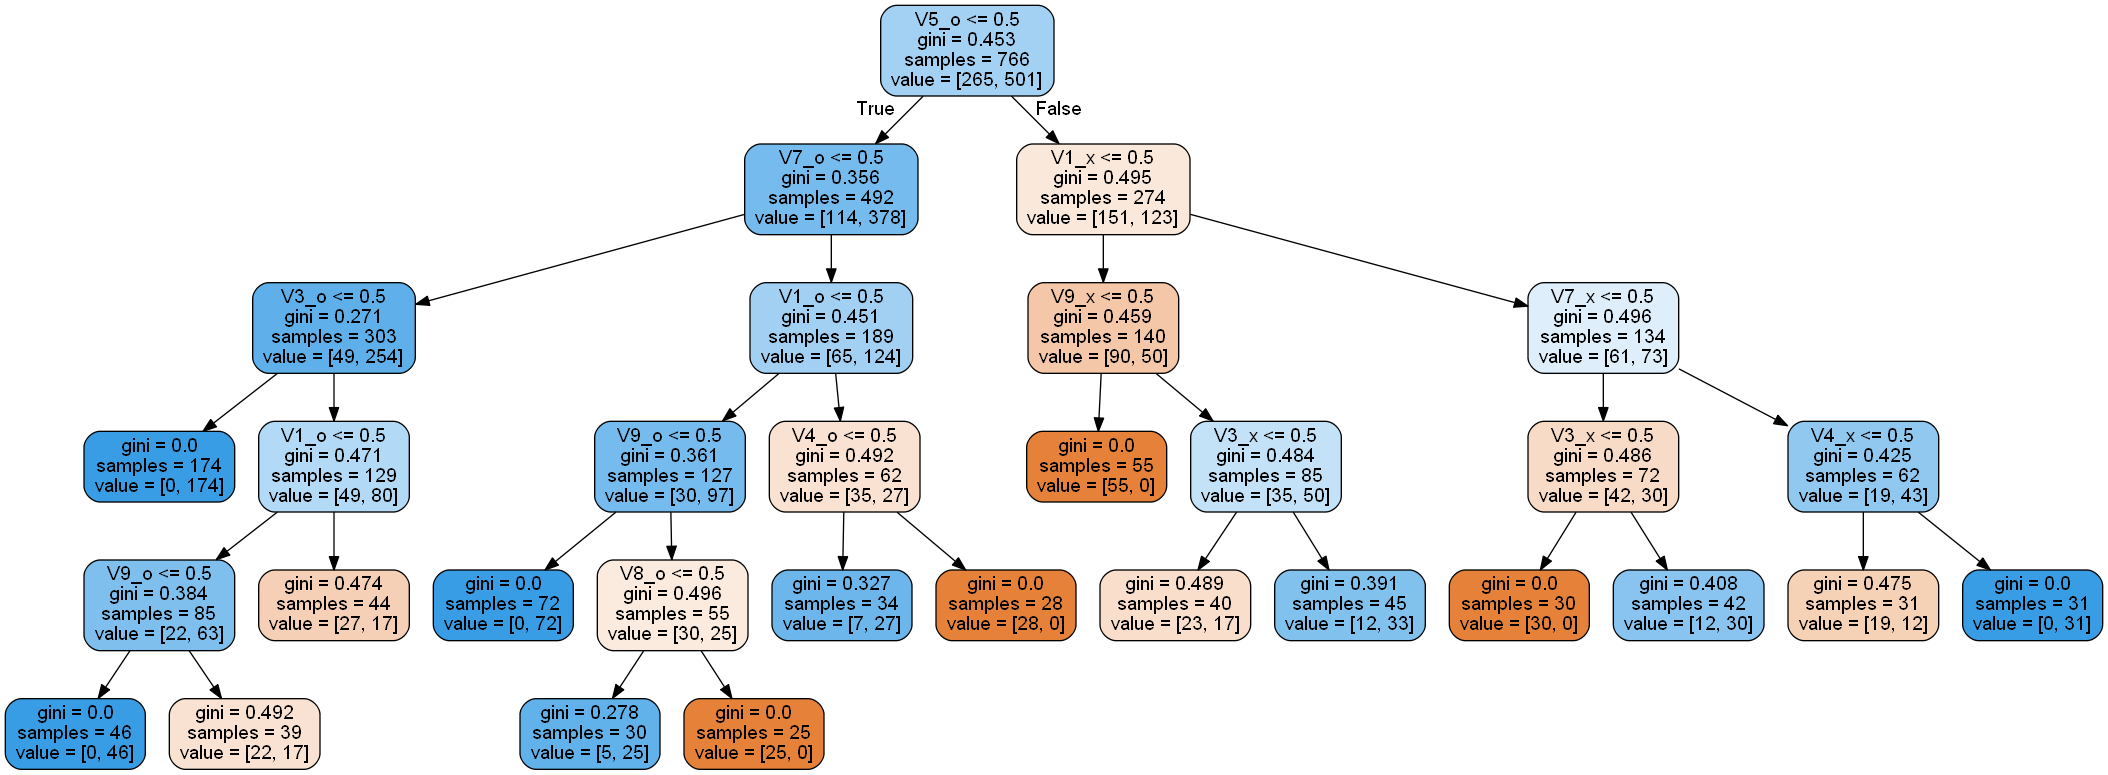

In [103]:
# 문자열 데이터를 저장하는 역할
dot_file =StringIO()

# export_graphviz: tree 시각화용
# tree.export_graphviz: reg_tree - 해당 model, feature_names - feature 이름, special_characters - 
tree.export_graphviz(dtc, feature_names=X_train.columns, out_file = dot_file, \
                     filled =True, rounded=True)

# Data를 graph로 표시하기 위해 Dot class로 변환
graph=pydotplus.graph_from_dot_data(dot_file.getvalue())

#dot_file.getvalue(): 데이터가 어떻게 들어가는지 볼 수 있음.
dot_file.getvalue() 

Image(graph.create_png())